In [3]:
# toogle view
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Meta

## Directories

In [1]:
#directories
import os
try:
    parentdir
except NameError:
    parentdir=os.getcwd()
else:
    parentdir = parentdir
# homedir=r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104/S101d14Feb17_60.5_635_A2_CuAzu655';#data directory
print('The working directory is parentdir: %s' %parentdir)
# print('The data directory is homedir: %s' %homedir)

The working directory is parentdir: /home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/Azurin_SM_repo/Manuscript/Figure_AT647N_SI


In [2]:
#list of folders and their directories CuAZUATTO647N % ZnAzuATTO647N
Analysis_dir = '/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/Azurin_SM_repo/Analysis'
data_dir = '/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data'#GIVE the PATH of this FOLDER.

ZnAzu_dir = os.path.join(data_dir, 'AzurinATTO647N/20180227_ZnAzu647N_sm')

In [3]:
# Checking or creating temp_dir
temp_dir = 'temp'
temp_dir = os.path.join(temp_dir)
if os.path.isdir(temp_dir):
    print('temp_dir exists')
else:
    os.makedirs(temp_dir)
    print('temp_dir created')

temp_dir exists


## Modules and run .py files

In [5]:
# import modules
import sys
sys.path.append(Analysis_dir)
from LongTraceAnalysis import LongTraceClass
from simulation import *
from Analysis import *
from ChangePointProcess import *

%matplotlib inline

## Figure Parameters

In [6]:
from pylab import *
matplotlib.rcParams['svg.fonttype'] = 'none'
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.size"] = "10"
rc('axes', linewidth=1)
# plt.savefig('/home/biswajit/Downloads/test.svg', format='svg', transparent=True)

# Time trace vs Potential: ZnAzurin647N

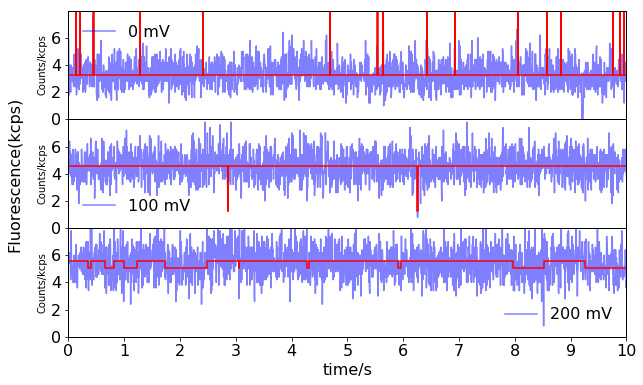

In [7]:
fig = timetraceplot_potentials(foldername=ZnAzu_dir, input_potential=[0, 100, 200],
                             pointnumbers=[1], x_lim_min=0, x_lim_max=10,
                             y_lim_min=0, y_lim_max=8, bintime=5e-3,
                             show_changepoint=False, figsize=(10, 6))
plt.savefig(os.path.join(temp_dir, 'timetrace_vs_V_az647N.svg'), format='svg', dpi=300, transparent=True)

# Simulated long trace

## By parts

In [22]:
simulated_hdf5 = os.path.join(data_dir, 'SimulatedData/20180423_1618_ton0.1toff0.5timelen3600bg150sig1500.hdf5');

Input file is 20180423_1618_ton0.1toff0.5timelen3600bg150sig1500.hdf5
looking for df_ts 82809


/home/biswajit/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/home/biswajit/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


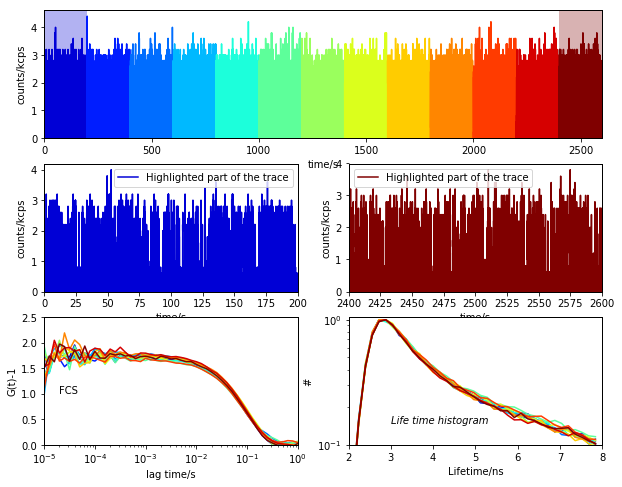

In [25]:
# Simulated data
ObjSim = LongTraceClass(simulated_hdf5, Simulation=True)
ObjSim.TimeLimit = [0, 2700]
ObjSim.LongTraceByParts(TimeWindow=2e2,TimePeriod=2e2);
ObjSim.PlotLongTraceByParts()
ObjSim.axis20.set_ylim(0, 2.5)
# ObjSim.axis10.set_xlim(2400, 2500)
#save figire
ObjSim.FigureByParts.savefig(os.path.join(temp_dir, 'SimulatedFigureByParts.svg'), format='svg', dpi=300, transparent=True)

# ZnAzuATTO655 Blinking

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Input file is Point_0.11uW_A3_-50mV(19)_200sec_4.pt3.hdf5
looking for df_ts 35814


/home/biswajit/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/home/biswajit/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


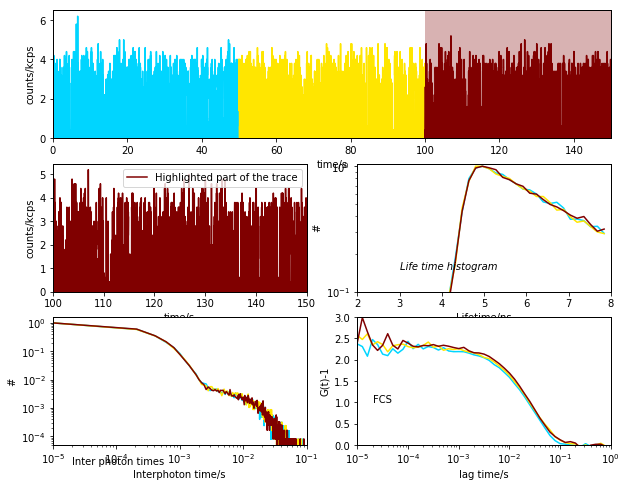

In [194]:
file_path_hdf5 = os.path.join(data_dir, 'AzurinATTO655/ZnAzurin_Data/20160909_ZnAzuA655/S82d9Sept16_A3/200sec_trace/Point_4/Point_0.11uW_A3_-50mV(19)_200sec_4.pt3.hdf5')
%load_ext autoreload
%autoreload 2
sys.path.append(Analysis_dir)
from LongTraceAnalysis import LongTraceClass

ob = LongTraceClass(file_path_hdf5)
ob.TimeLimit = [0, 180]
ob.LongTraceByParts(TimeWindow=5e1,TimePeriod=5e1);
ob.PlotLongTraceByParts()
ob.axis21.set_ylim(0, 3)
# ob.axis10.set_xlim(100, 125)
ob.FigureByParts.savefig(
    os.path.join(temp_dir, 'FigureByPartsZnAzuATTO655Blinking.svg'),
    format='svg', dpi=300, transparent=True)

# ZnAzurinATTO647N

Input file is S103_550p_A3_100mV(35)_9.pt3.hdf5


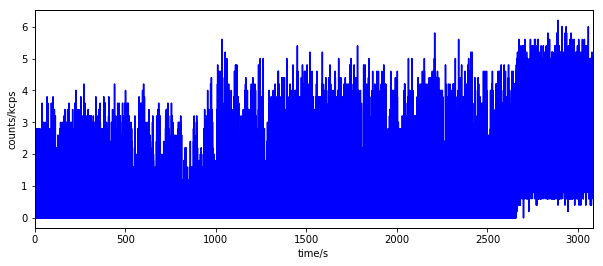

In [9]:
file_path_hdf5_1 = os.path.join(data_dir, 'AzurinATTO647N/S130d02MAr18_590p_A3_100mV_longtimes/S103_550p_A3_100mV(35)_9.pt3.hdf5')

ObjLongTraceMeasured = LongTraceClass(file_path_hdf5_1)
# ObjLongTraceMeasured.TimeLimit = [0, 1200]
ObjLongTraceMeasured.PlotTimeTrace(figsize=(10, 4))

looking for df_ts 260487


/home/biswajit/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/home/biswajit/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


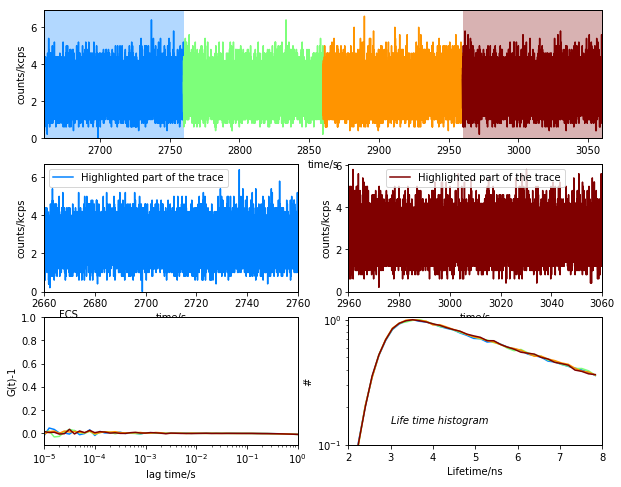

In [20]:
ObjLongTraceMeasured.TimeLimit = [2660, 3150]
ObjLongTraceMeasured.LongTraceByParts(TimeWindow=1e2,TimePeriod=1e2);
ObjLongTraceMeasured.PlotLongTraceByParts()

ObjLongTraceMeasured.axis20.set_ylim(-0.1, 1)
ObjLongTraceMeasured.FigureByParts.savefig(
    os.path.join(temp_dir, 'FigureByPartsZnAzuATTO647NBlinking.svg'),
    format='svg', dpi=300, transparent=True)

# Lifetime of bright nad dark state

In [52]:
file_path_hdf5 = os.path.join(data_dir, 'AzurinATTO647N/S130d02MAr18_590p_A3_100mV_longtimes/data/S103_550p_A3_100mV(35)_9.hdf5')
file_path_hdf5_Zn = os.path.join(data_dir, 'AzurinATTO647N/20180227_ZnAzu647N_sm/data/S128_Point_590p_A3_0200mV(8)_1.pt3.hdf5')
file_path_hdf5_irf = os.path.join(data_dir, 'misc/lifetime_irf/20180219IrfAuNRLuminiscence.pt3.hdf5')
ob = LongTraceClass(file_path_hdf5)
ob.TimeLimit = [0, 2000]
df_dig = ob.DigitizePhotons(nanotimes_bool=True)

ob_Zn = LongTraceClass(file_path_hdf5_Zn)
ob_Zn.TimeLimit = [0, 2000]
# df_dig_Zn = ob_Zn.DigitizePhotons(nanotimes_bool=True)
ob_irf = LongTraceClass(file_path_hdf5_irf)

Input file is S103_550p_A3_100mV(35)_9.hdf5
Input file is S128_Point_590p_A3_0200mV(8)_1.pt3.hdf5
Input file is 20180219IrfAuNRLuminiscence.pt3.hdf5


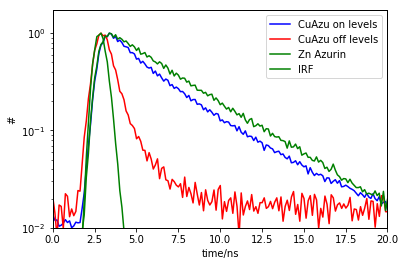

In [59]:
df_on = df_dig[df_dig['state']==2].reset_index(drop=True)
df_off = df_dig[df_dig['state']==1].reset_index(drop=True)

#
fig = plt.figure(figsize=[6, 4])
nrows=1;ncols=1
ax00 = plt.subplot2grid((nrows,ncols), (0,0))
# lifetime histogram
n, t = np.histogram(df_on['nanotimes'], bins=200)
ax00.plot(t[:-1], n/max(n),'b', label='CuAzu on levels');
n, t = np.histogram(df_off['nanotimes'], bins=200)
n = n-min(n)
ax00.plot(t[:-1], n/max(n),'r', label='CuAzu off levels');
# ZnAzurin
n, t = np.histogram(1e9*ob_Zn.nanotimes, bins=200)
ax00.plot(t[:-1], n/max(n),'g', label='Zn Azurin');
# irf
n, t = np.histogram(1e9*ob_irf.nanotimes, bins=200)
n = n-min(n)
ax00.plot(t[:-1], n/max(n),'g', label='IRF');
ax00.set_yscale('log')
ax00.set_xlabel('time/ns')
ax00.set_ylabel('#')
ax00.set_xlim(0, 20)
ax00.set_ylim(1e-2, None)
ax00.legend()
plt.savefig(os.path.join(temp_dir, 'FluorescenceLifeTimeBrightDark.svg'), format='svg', dpi=300, transparent=True)

# Calculation: Bright-Dark ratio Vs Potential

In [16]:
# functions
def substrate_conc(E0, E, M, n=1):
    '''All potential values are in mV'''
    #E = E + 240; E0=E0+240;
    Ecorr = 10**((E-E0)*n/59) # DUBIOUS formula
    S_oxd = (M*Ecorr)/(1+Ecorr)
    S_red = M/(1+Ecorr)
    return E, S_oxd, S_red #E-240
def RatioVsPotential(ax00, ax01, ax10, ax11, M_FeCN, color=None):
    E=np.arange(0, 250, 10)
    E, FeCN_oxd, FeCN_red = substrate_conc(E0=180, E=E, M=M_FeCN)
    
    kneg3=35
    K1 = 15*1e-5#kneg1/k1
    k3 = 5
    K2 = 2.45*1e-5#kneg2/k2
    tDark = (1/k3)*(1+(K1/FeCN_red))
    tBright = (1/kneg3)*(1+(K2/FeCN_oxd))
    OxByRed = (kneg3/k3)*((1+(K1/FeCN_red))/(1+(K2/FeCN_oxd)))

    # ax00.plot(E, OxByRed)
    ax00.plot(E, tDark/tBright, color=color, label=str(M_FeCN*1e6)+' uM')
    ax00.axhline(y=1, linestyle='--')
    ax00.set_yscale('log')
    ax00.set_ylabel('tDark/tBright')
    ax00.set_xlabel('Potential')

    ax01.plot(E, tBright, 'o', ms=3, color=color, label=str(M_FeCN*1e6)+' uM')
    ax01.plot(E, tDark, '--', color=color, label=str(M_FeCN*1e6)+' uM')
    ax01.set_ylabel('Duration/s')
    ax01.set_xlabel('Potential')
    ax01.set_xlim(0, 200)
    ax01.set_yscale('log')
    
    ax10.plot(1/FeCN_oxd, tBright, 'o', ms=2, color=color, label=str(M_FeCN*1e6)+' uM')
    ax11.plot(1/FeCN_red, tDark, '--', ms=2, color=color, label=str(M_FeCN*1e6)+' uM')
    
    return
E=np.arange(0, 250, 1)
M_FeCN = 20e-6
E, FeCN_oxd, FeCN_red = substrate_conc(E0=180, E=E, M=M_FeCN)

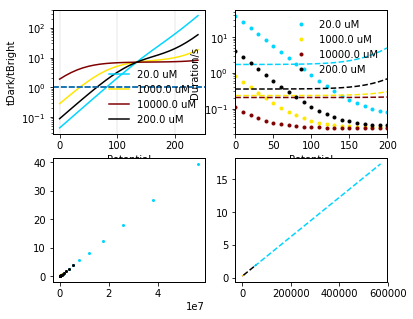

In [17]:
fig = plt.figure(figsize=(6,5))
nrows=2;ncols=2
ax00 = plt.subplot2grid((nrows,ncols), (0,0))
ax01 = plt.subplot2grid((nrows,ncols), (0,1))
ax10 = plt.subplot2grid((nrows,ncols), (1,0))
ax11 = plt.subplot2grid((nrows,ncols), (1,1))
conc_list = 1e-6*np.array([20, 1000,10000]) #in uM

N=len(conc_list)
cmap = plt.get_cmap('jet')#jet_r
ic=1
for i in conc_list:
    M_FeCN = i
    color = cmap(float(ic)/N)
    ic=ic+1
    RatioVsPotential(ax00, ax01, ax10, ax11, M_FeCN, color=color)

M_FeCN = 200e-6
RatioVsPotential(ax00, ax01, ax10, ax11, M_FeCN, color='k')
# ax00.set_xlim(0, 200)
# ax00.grid(True)
ax00.grid(True, axis = 'x', lw=0.3)
# ax11.set_xscale('log')
# ax11.set_yscale('log')
ax01.legend(frameon=False)
ax00.legend(frameon=False)
plt.savefig(os.path.join(temp_dir, 'CalculatedBrightDarkRatio.svg'), format='svg', dpi=300, transparent=True)

# Electrochemistry

## Cyclic Voltametry

0.18


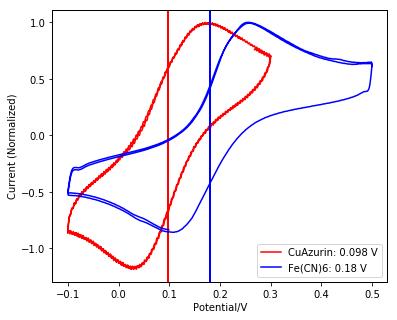

In [38]:
# cyclic voltamtery
fig = plt.figure(figsize=(6,5))
nrows=1;ncols=1
ax00 = plt.subplot2grid((nrows,ncols), (0,0))

# Electro chemistry
f_CuAzu = os.path.join(data_dir,'misc/cyclic_voltametry/CV 120 uM azurin in hepes ph 7 10 mV_s.xlsx');
os.path.isfile(f_CuAzu)
f = pd.read_excel(f_CuAzu)
left_n = 10000;right_n=-16000
V_corr = 0
V = f['Potential applied (V)'][left_n:right_n]-V_corr;
I = f['WE(1).Current (A)'][left_n:right_n];
Id_max = I.idxmax(); Id_min = I.idxmin()
V_max = V[Id_max]; V_min = V[Id_min]
E0_CuAzu = round((V_max+V_min)/2, 3);
ax00.plot(V, I/max(I),'r', label='CuAzurin: '+str(E0_CuAzu)+' V')
ax00.axvline(x=E0_CuAzu, color='r', lw=2)
ax00.set_ylabel('Current')

# FeCN
f_FeCN = os.path.join(data_dir,'misc/cyclic_voltametry/20180228_cv_200umferro.txt');
f = pd.read_csv(f_FeCN, header=None, skiprows=78)
f = f.dropna().astype('float')
f[1] = -1*f[1]
V = f[0][-2000:]; I = f[1][-2000:]
I = I/max(I)
Id_max = I.idxmax(); Id_min = I.idxmin()
V_max = V[Id_max]; V_min = V[Id_min]
E0_FeCN = round((V_max+V_min)/2, 3);
print(E0_FeCN)
ax00.plot(V, I[-2000:], 'b', label='Fe(CN)6: '+str(E0_FeCN)+' V')
ax00.axvline(x=E0_FeCN, color='b', lw=2)

ax00.set_xlabel('Potential/V')
ax00.set_ylabel('Current (Normalized)')
ax00.legend();

plt.savefig(os.path.join(temp_dir, 'CyclicVoltametry.svg'), format='svg', dpi=300, transparent=True)

## i-t curve

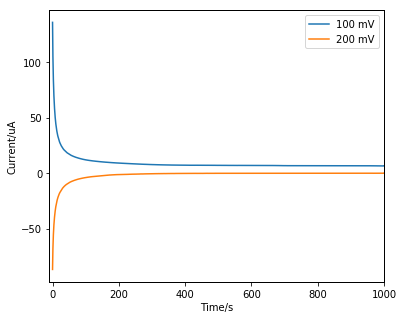

In [43]:
# i-t curve 

fig = plt.figure(figsize=(6,5))
nrows=1;ncols=1
ax00 = plt.subplot2grid((nrows,ncols), (0,0))

f_FeCN_it = os.path.join(data_dir,'misc/cyclic_voltametry/8_amp_0100mv.txt')
f = pd.read_csv(f_FeCN_it, header=None, skiprows=17)
ax00.plot(f[0], f[1]*1e6, label='100 mV')

f_FeCN_it = os.path.join(data_dir,'misc/cyclic_voltametry/7_amp_0200mv.txt')
f = pd.read_csv(f_FeCN_it, header=None, skiprows=127)
ax00.plot(f[0], f[1]*1e6, label='200 mV')

# ax00.axhline(y=0)
# ax00.set_xscale('log')
ax00.set_xlim(-10, 1000)
ax00.set_xlabel('Time/s')
ax00.set_ylabel(r'Current/uA')
ax00.legend()
plt.savefig(os.path.join(temp_dir, 'itCurve.svg'), format='svg', dpi=300, transparent=True)

# Electron Transfer Simulation

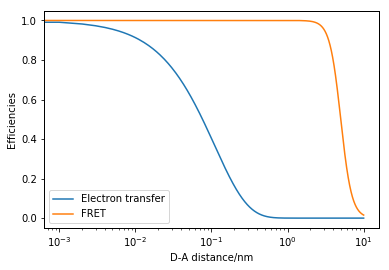

In [24]:
R0_fret = 5 # nm
R0_ET = 0.11 # in nm # 1.1 Angstrom
r = np.linspace(0, 10, 10000);
plt.plot(r, np.exp(-r/R0_ET), label = 'Electron transfer')
plt.plot(r, 1/(1+(r/R0_fret)**6), label = 'FRET')
plt.xlabel('D-A distance/nm')
plt.ylabel('Efficiencies')

plt.xscale('log')
# plt.yscale('log')
plt.legend();